In [1]:
import os
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from google.colab import drive, files

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# point to the drive directory
endo_dir = '/content/drive/MyDrive/endometriosis/'

In [21]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

In [5]:
# plt.rc('axes', titlesize=24)     # fontsize of the axes title
# plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
# plt.rc('legend', fontsize=22)    # legend fontsize

## Topics

In [6]:
#Load topic modeling file
topic_model_file = os.path.join(endo_dir, 'output', 'topic-modeling', 'parags', 'endo+endometriosis-25_10.pkl')
tomo_df = pd.read_pickle(topic_model_file).reset_index().rename(columns = {"index":"id"}) # change index into column

# add column with info about where the paragraph comes from, whether post or comment
tomo_df['og_id'] = ['_'.join(x.split('_')[:3]) for x in tomo_df.id]

# group paragraphs' distributions by the post/comment the paragraph comes from, taking the average of the distributions
type_df = tomo_df.drop(columns=['id', 'dominant_topic', 'og_doc']).groupby(['og_id'], sort=False, as_index=True).mean()

In [7]:
tomo_df[:1]

,id,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,...,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,dominant_topic,og_doc,og_id
0,Endo_c3efp47_comment_0,0.002912,0.006003,0.006602,0.003366,0.005466,0.006906,0.004495,0.012667,0.00541,...,0.006114,0.424103,0.009673,0.006929,0.002745,0.004493,0.322296,19,[Soy is a no go as it increases estrogen in yo...,Endo_c3efp47_comment


In [8]:
type_df[:1]

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24
og_id,,,,,,,,,,,,,,,,,,,,,
Endo_c3efp47_comment,0.002912,0.006003,0.006602,0.003366,0.005466,0.006906,0.004495,0.012667,0.00541,0.007698,...,0.003977,0.116229,0.00515,0.006114,0.424103,0.009673,0.006929,0.002745,0.004493,0.322296


In [9]:
colors_d = {'color_0': sns.color_palette('pastel')[0],
            'color_1': sns.color_palette('pastel')[1],
            'color_2': sns.color_palette('pastel')[2],
            'color_3': sns.color_palette('pastel')[3],
            'color_4': sns.color_palette('pastel')[4]}

In [10]:
# colors_d = {'color_0': '#009E73'.lower(),
#             'color_1': '#F0E442'.lower(),
#             'color_2': '#0072B2'.lower(),
#             'color_3': '#D55E00'.lower(),
#             'color_4': '#CC79A7'.lower()}

In [11]:
color_groups = ['color_0', 'color_0', 'color_0', 'color_0', 'color_0',
          'color_1',  'color_1', 'color_1', 'color_1',
          'color_2', 'color_2', 'color_2', 'color_2', 'color_2', 'color_2', 'color_2',
          'color_3', 'color_3', 'color_3', 'color_3',
          'color_4', 'color_4', 'color_4', 'color_4', 'color_4']

In [12]:
import matplotlib.patches as mpatches

In [13]:
patch0 = mpatches.Patch(color=colors_d['color_0'], label='Symptoms')
patch1 = mpatches.Patch(color=colors_d['color_1'], label='Medications')
patch2 = mpatches.Patch(color=colors_d['color_2'], label='Healthcare')
patch3 = mpatches.Patch(color=colors_d['color_3'], label='Self-care')
patch4 = mpatches.Patch(color=colors_d['color_4'], label='Life issues')

### Average probability

In [14]:
topics_names_list = ["Topic 0: Gastrointestinal",
    "Topic 3: Pelvic floor",
    "Topic 5: Menstruation",
    "Topic 17: Muscular ",
    "Topic 21: Sharing symptoms",
    "Topic 14: Pain management",
    "Topic 23: Drugs",
    "Topic 18: Hormonal drug experiences",
    "Topic 24: Info on hormonal drugs",
    "Topic 1: Information on surgery",
    "Topic 2: Medical information",
    "Topic 4: Getting diagnosed",
    "Topic 6: Online resources",
    "Topic 9: Specialists",
    "Topic 13: Insurance",
    "Topic 20: Medical appointments",
    "Topic 8: Post surgery recovery",
    "Topic 15: Product recommendations",
    "Topic 19: Diet",
    "Topic 22: Comfort items",
    "Topic 7: Dismissal",
    "Topic 10: Gratitude",
    "Topic 11: Medical stories",
    "Topic 12: Fertility",
    "Topic 16: Empathy",
    ]

topics_names = {}
for topic_name in topics_names_list:
  topics_names[topic_name.split(":")[0]] = topic_name #.split(":")[1]

In [15]:
# include long names in the df
type_df = type_df.rename(columns=topics_names)

In [16]:
type_df[:1]

,Topic 0: Gastrointestinal,Topic 1: Information on surgery,Topic 2: Medical information,Topic 3: Pelvic floor,Topic 4: Getting diagnosed,Topic 5: Menstruation,Topic 6: Online resources,Topic 7: Dismissal,Topic 8: Post surgery recovery,Topic 9: Specialists,...,Topic 15: Product recommendations,Topic 16: Empathy,Topic 17: Muscular,Topic 18: Hormonal drug experiences,Topic 19: Diet,Topic 20: Medical appointments,Topic 21: Sharing symptoms,Topic 22: Comfort items,Topic 23: Drugs,Topic 24: Info on hormonal drugs
og_id,,,,,,,,,,,,,,,,,,,,,
Endo_c3efp47_comment,0.002912,0.006003,0.006602,0.003366,0.005466,0.006906,0.004495,0.012667,0.00541,0.007698,...,0.003977,0.116229,0.00515,0.006114,0.424103,0.009673,0.006929,0.002745,0.004493,0.322296


In [17]:
type_df = type_df[topics_names_list].copy() # reorder columns
type_df['type'] = [x.split('_')[2] for x in type_df.index]
print(len(type_df))
type_df[:1]

334042


,Topic 0: Gastrointestinal,Topic 3: Pelvic floor,Topic 5: Menstruation,Topic 17: Muscular,Topic 21: Sharing symptoms,Topic 14: Pain management,Topic 23: Drugs,Topic 18: Hormonal drug experiences,Topic 24: Info on hormonal drugs,Topic 1: Information on surgery,...,Topic 8: Post surgery recovery,Topic 15: Product recommendations,Topic 19: Diet,Topic 22: Comfort items,Topic 7: Dismissal,Topic 10: Gratitude,Topic 11: Medical stories,Topic 12: Fertility,Topic 16: Empathy,type
og_id,,,,,,,,,,,,,,,,,,,,,
Endo_c3efp47_comment,0.002912,0.003366,0.006906,0.00515,0.006929,0.004903,0.004493,0.006114,0.322296,0.006003,...,0.00541,0.003977,0.424103,0.002745,0.012667,0.010999,0.008983,0.006272,0.116229,comment


In [18]:
mean_topics_d = {'Topic': [], 'Type': [], 'Average Probability': []}
for topic in type_df.columns[0:25]:
  for typ in ['Post', 'Comment']:
    mean_topics_d['Topic'].append(topic)
    mean_topics_d['Type'].append(typ)
    mean_topics_d['Average Probability'].append(type_df.loc[type_df['type'] == typ.lower()][topic].mean())
mean_topics_df = pd.DataFrame(mean_topics_d)

In [19]:
#all = mean_topics_df.groupby('Topic').mean()

In [20]:
import matplotlib.ticker as mtick
def make_barplot(df, typ, _palette_posts):

  _fig = plt.figure(figsize=(17, 9))
  ax = sns.barplot(data=df, x='Topic', y='Average Probability',
                   hue='Topic', legend=False,
                  palette=_palette_posts,
                  edgecolor='white',
                  errorbar=None)

  ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
  ax.spines['top'].set_visible(False) # Remove top, left, right border
  ax.spines['right'].set_visible(False)

  ax.set_xticks(ax.get_xticks())
  ax.set_xticklabels(df['Topic'].tolist(), rotation=45, ha='right', fontsize=12)
  #ax.set_yticklabels([f'{x}%' for x in [0,2,4,6,8,10]])
  ax.set_ylim(ymax=0.1) #ymax=10

  for container in ax.containers:
    for v in container:
      labels = [str(round(v.get_height(),2))[1:] for v in container] #str(round(v.get_height()))+'%'
      ax.bar_label(container, labels=labels, padding=3, fontsize=12)

  ax.legend(handles=[patch0, patch1, patch2, patch3, patch4], fontsize=14,
            bbox_to_anchor=(1.1, 1.1), loc='upper right', borderaxespad=0.)

  plt.ylabel('Average Probability', fontsize=14)
  plt.xlabel('')
  plt.title(f'Topic Probabilities in {typ}', fontsize=16)
  #plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'topic_{typ.lower()}b.png'), dpi = 300, bbox_inches = "tight")
  return _fig

#### Posts

In [21]:
posts = mean_topics_df[mean_topics_df['Type']=='Post'].copy().reset_index().drop(columns=['index'])
posts['Color'] = color_groups
posts.sort_values(['Color','Average Probability'], ascending=[True, False], inplace=True)
posts

,Topic,Type,Average Probability,Color
4,Topic 21: Sharing symptoms,Post,0.079837,color_0
2,Topic 5: Menstruation,Post,0.079277,color_0
3,Topic 17: Muscular,Post,0.045522,color_0
1,Topic 3: Pelvic floor,Post,0.014127,color_0
0,Topic 0: Gastrointestinal,Post,0.013642,color_0
7,Topic 18: Hormonal drug experiences,Post,0.052978,color_1
6,Topic 23: Drugs,Post,0.031479,color_1
8,Topic 24: Info on hormonal drugs,Post,0.031293,color_1
5,Topic 14: Pain management,Post,0.026011,color_1
15,Topic 20: Medical appointments,Post,0.080816,color_2


In [22]:
palette_posts = [colors_d[color] for color in posts['Color'].tolist()]

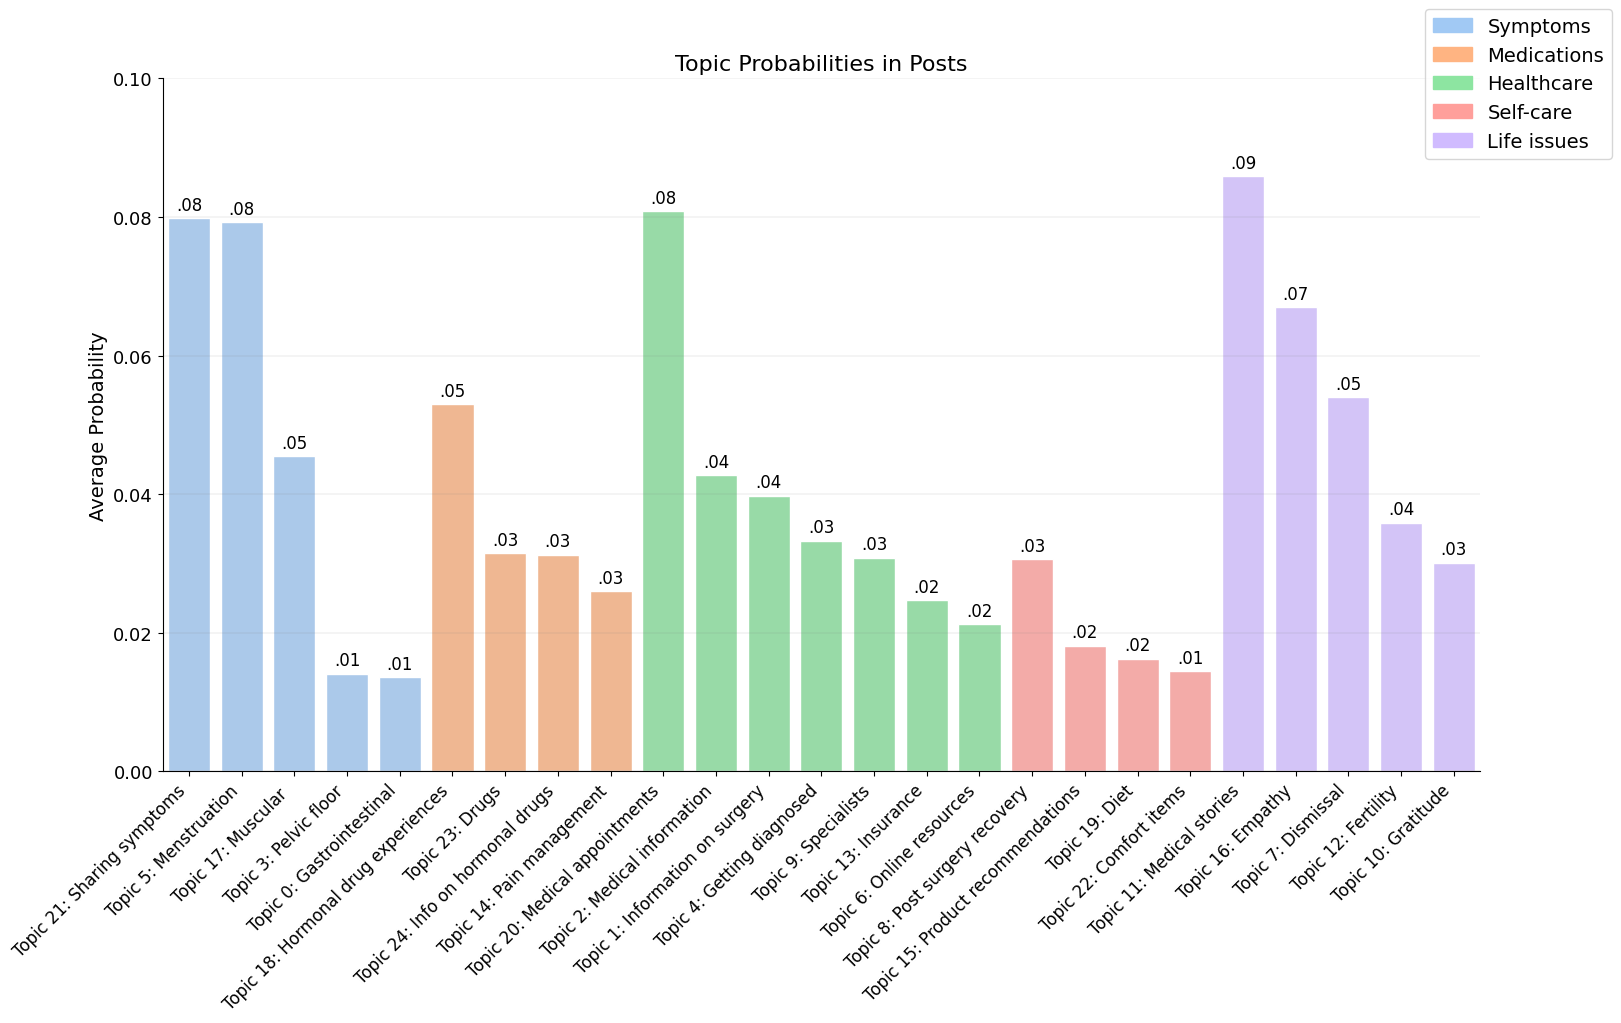

In [23]:
fig = make_barplot(posts, 'Posts', palette_posts)
plt.show()

#### Comments

In [24]:
comments = mean_topics_df[mean_topics_df['Type']=='Comment'].copy().reset_index().drop(columns=['index'])
comments['Color'] = color_groups
comments.sort_values(['Color','Average Probability'], ascending=[True, False], inplace=True)
comments

,Topic,Type,Average Probability,Color
4,Topic 21: Sharing symptoms,Comment,0.039321,color_0
2,Topic 5: Menstruation,Comment,0.036823,color_0
3,Topic 17: Muscular,Comment,0.032081,color_0
1,Topic 3: Pelvic floor,Comment,0.020898,color_0
0,Topic 0: Gastrointestinal,Comment,0.020453,color_0
8,Topic 24: Info on hormonal drugs,Comment,0.041001,color_1
7,Topic 18: Hormonal drug experiences,Comment,0.039607,color_1
5,Topic 14: Pain management,Comment,0.031620,color_1
6,Topic 23: Drugs,Comment,0.029210,color_1
15,Topic 20: Medical appointments,Comment,0.056901,color_2


In [25]:
palette_comments = [colors_d[color] for color in comments['Color'].tolist()]

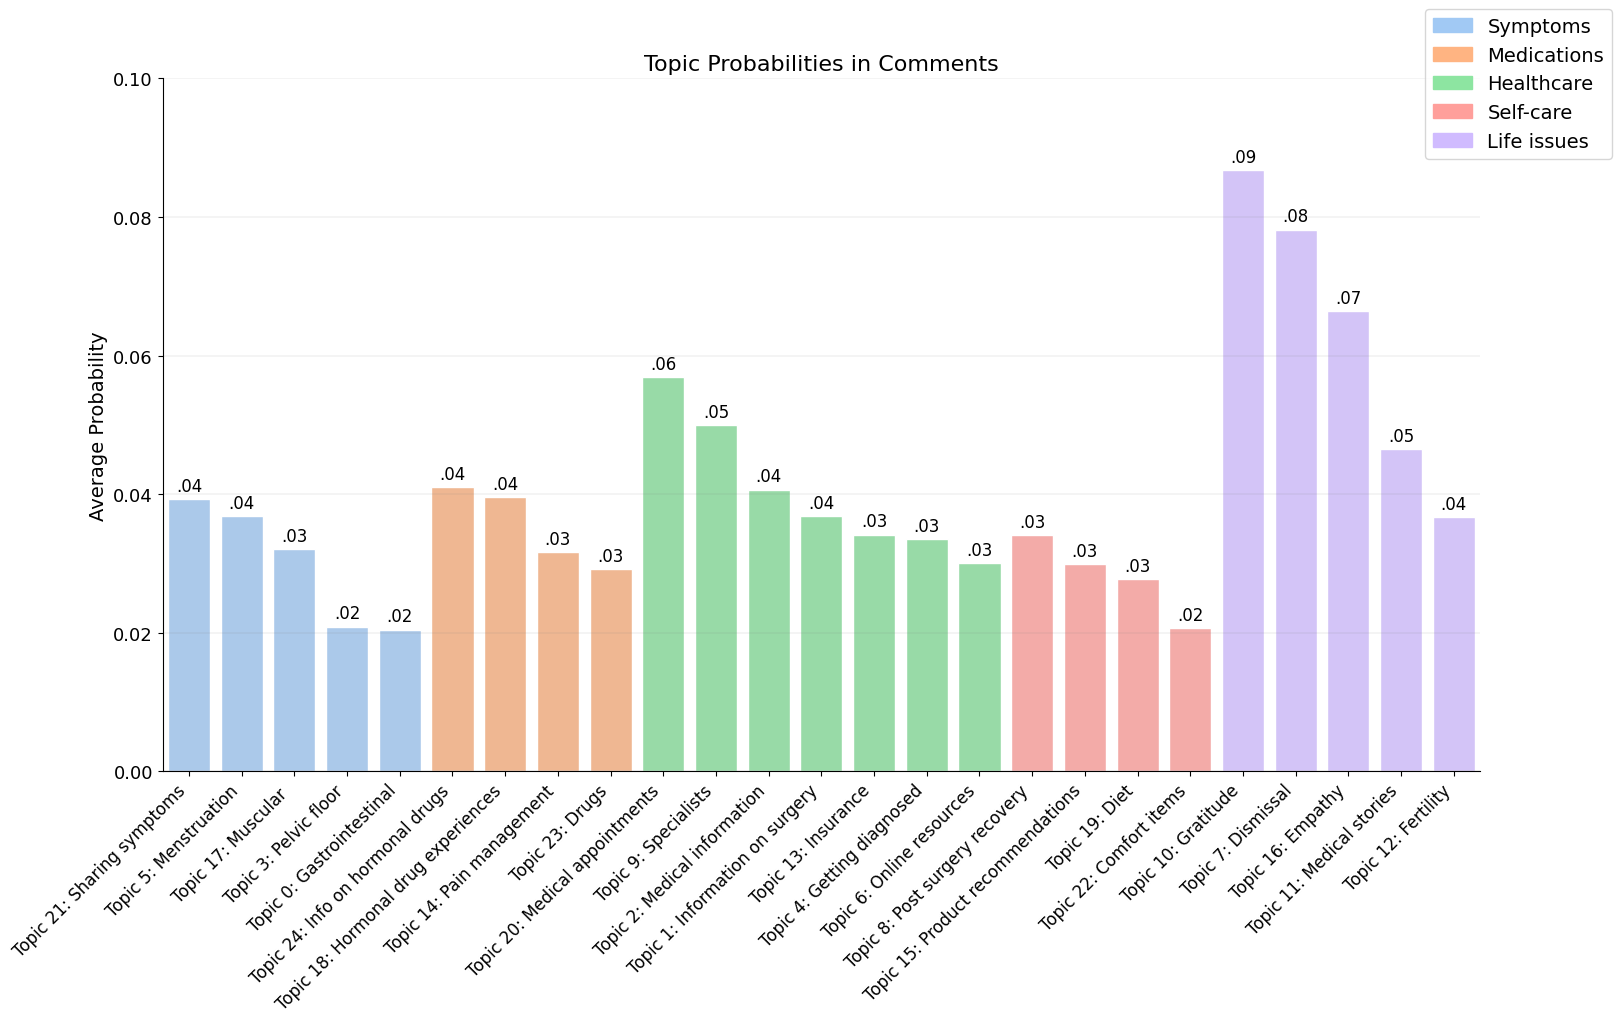

In [26]:
fig = make_barplot(comments, 'Comments', palette_posts)
plt.show()

### Dominant Topic

In [32]:
type_df['dominant_topic'] = np.argmax(type_df.iloc[:, 0:25].values, axis=1)

In [33]:
type_df['type'] = [x.split('_')[2] for x in type_df.index]
print(len(type_df))
type_df[:1]

334042


,Topic 0: Gastrointestinal,Topic 3: Pelvic floor,Topic 5: Menstruation,Topic 17: Muscular,Topic 21: Sharing symptoms,Topic 14: Pain management,Topic 23: Drugs,Topic 18: Hormonal drug experiences,Topic 24: Info on hormonal drugs,Topic 1: Information on surgery,...,Topic 15: Product recommendations,Topic 19: Diet,Topic 22: Comfort items,Topic 7: Dismissal,Topic 10: Gratitude,Topic 11: Medical stories,Topic 12: Fertility,Topic 16: Empathy,type,dominant_topic
og_id,,,,,,,,,,,,,,,,,,,,,
Endo_c3efp47_comment,0.002912,0.003366,0.006906,0.00515,0.006929,0.004903,0.004493,0.006114,0.322296,0.006003,...,0.003977,0.424103,0.002745,0.012667,0.010999,0.008983,0.006272,0.116229,comment,18


In [34]:
dom_topics_d = {'Topic': [], 'Type': [], 'Percentage': []}
for topic in type_df.columns[0:25]:
  for typ in ['Post', 'Comment']:
    topic_num = int(topic.split(':')[0][-1])
    cond = (type_df['type'] == typ.lower()) & (type_df['dominant_topic'] == topic_num)
    perc = len(type_df.loc[cond])/len(type_df.loc[type_df['type'] == typ.lower()])
    dom_topics_d['Topic'].append(topic)
    dom_topics_d['Type'].append(typ)
    dom_topics_d['Percentage'].append(perc)
dom_topics_df = pd.DataFrame(dom_topics_d)

In [36]:
dom_topics_df.loc[dom_topics_df['Type'] == "Post"].sort_values('Percentage', ascending=False).reset_index(drop=True)

,Topic,Type,Percentage
0,Topic 12: Fertility,Post,0.104124
1,Topic 22: Comfort items,Post,0.104124
2,Topic 2: Medical information,Post,0.104124
3,Topic 14: Pain management,Post,0.099942
4,Topic 24: Info on hormonal drugs,Post,0.099942
5,Topic 4: Getting diagnosed,Post,0.099942
6,Topic 17: Muscular,Post,0.059754
7,Topic 7: Dismissal,Post,0.059754
8,Topic 13: Insurance,Post,0.047938
9,Topic 23: Drugs,Post,0.047938


In [37]:
dom_topics_df.loc[dom_topics_df['Type'] == "Comment"].sort_values('Percentage', ascending=False).reset_index(drop=True)

,Topic,Type,Percentage
0,Topic 7: Dismissal,Comment,0.041327
1,Topic 17: Muscular,Comment,0.041327
2,Topic 8: Post surgery recovery,Comment,0.040323
3,Topic 18: Hormonal drug experiences,Comment,0.040323
4,Topic 14: Pain management,Comment,0.037038
5,Topic 24: Info on hormonal drugs,Comment,0.037038
6,Topic 4: Getting diagnosed,Comment,0.037038
7,Topic 19: Diet,Comment,0.033957
8,Topic 9: Specialists,Comment,0.033957
9,Topic 22: Comfort items,Comment,0.033083


#### Groups

In [42]:
def settings_ax(_ax, group):
  for container in _ax.containers:
    for v in container:
      labels = [f'{round(v.get_height(),2)}%' for v in container]
      _ax.bar_label(container, labels=labels, padding=3) #, fontsize=10)

  # newwidth=0.3
  # for bar in _ax.patches:
  #     x = bar.get_x()
  #     width = bar.get_width()
  #     centre = x+width/2.
  #     bar.set_x(centre-newwidth/2.)
  #     bar.set_width(newwidth)

  _ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

  _ax.spines['top'].set_visible(False) # Remove top, left, right border
  _ax.spines['right'].set_visible(False)

  _ax.set_title(group, fontsize=16)

  _ax.set_xlabel('')
  # for label in _ax.get_xticklabels():
  #   label.set_ha("right")
  #   label.set_rotation(45)
  _ax.set_xticklabels(_ax.get_xticklabels(), fontsize=12, rotation=45, ha='right')
  _ax.set_ylabel('Average Probability', fontsize=12)
  #_ax.set_yticklabels(_ax.get_yticklabels(), fontsize=11)
  _ax.set_ylim(ymax=0.1)

  #_ax.tick_params(left=False, labelleft = False, labelsize=10)

In [ ]:
fig = plt.figure(figsize=(15,23))
spec = mpl.gridspec.GridSpec(ncols=4, nrows=3) # 6 columns evenly divides both 2 & 3

sub1 = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax1 = sns.barplot(data=mean_topics_df.iloc[0:10],
                 x='Topic', y='Average Probability', hue='Type',
                palette='pastel',
                edgecolor='white',
                errorbar=None)
settings_ax(ax1, 'Symptoms')

sub2 = fig.add_subplot(spec[0,2:4])
ax2 = sns.barplot(data=mean_topics_df.iloc[10:18],
                 x='Topic', y='Average Probability', hue='Type',
                palette='pastel',
                edgecolor='white',
                errorbar=None)
settings_ax(ax2, 'Medications')

sub3 = fig.add_subplot(spec[1,0:2])
ax3 = sns.barplot(data=mean_topics_df.iloc[18:30],
                 x='Topic', y='Average Probability', hue='Type',
                palette='pastel',
                edgecolor='white',
                errorbar=None)
settings_ax(ax3, 'Healthcare')

sub4 = fig.add_subplot(spec[1,2:4]) # row 0 with axes spanning 2 cols on odds
ax4 = sns.barplot(data=mean_topics_df.iloc[30:40],
                 x='Topic', y='Average Probability', hue='Type',
                palette='pastel',
                edgecolor='white',
                errorbar=None)
settings_ax(ax4, 'Self-care')

sub5 = fig.add_subplot(spec[2,1:3])
ax5 = sns.barplot(data=mean_topics_df.iloc[40:50],
                 x='Topic', y='Average Probability', hue='Type',
                palette='pastel',
                edgecolor='white',
                errorbar=None)
settings_ax(ax5, 'Life issues')

plt.tight_layout()
# plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'Topics.png'), dpi = 300, bbox_inches = "tight")
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=mean_topics_df.iloc[0:10],
                 x='Topic', y='Mean probability', hue='Type',
                palette='pastel',
                edgecolor='white',
                ci=None)
settings_ax(ax, 'Symptoms')
#plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'Topic_symptoms.png'), dpi = 300, bbox_inches = "tight", pad_inches=0.2)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=mean_topics_df.iloc[10:18],
                 x='Topic', y='Mean probability', hue='Type',
                 palette='pastel',
                 edgecolor='white',
                 ci=None)

settings_ax(ax, 'Medications')
#plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'Topic_medications.png'), dpi = 300, bbox_inches = "tight", pad_inches=0.2)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=mean_topics_df.iloc[18:30],
                 x='Topic', y='Mean probability', hue='Type',
                 palette='pastel',
                 edgecolor='white',
                 ci=None)

settings_ax(ax, 'Healthcare')
#plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'Topic_healthcare.png'), dpi = 300, bbox_inches = "tight", pad_inches=0.2)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=mean_topics_df.iloc[30:40],
                 x='Topic', y='Mean probability', hue='Type',
                palette='pastel',
                edgecolor='white',
                ci=None)
settings_ax(ax, 'Self-care')
plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'Topic_selfcare.png'), dpi = 300, bbox_inches = "tight", pad_inches=0.2)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(data=mean_topics_df.iloc[40:50],
                 x='Topic', y='Mean probability', hue='Type',
                palette='pastel',
                edgecolor='white',
                ci=None)
settings_ax(ax, 'Life issues')
plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'Topic_lifeissues.png'), dpi = 300, bbox_inches = "tight")
plt.show()

## Personas

In [5]:
# load file with personas predictions
personas_file = os.path.join(endo_dir, 'output', 'predictions', 'PERSONAS', 'personas_predictions.pkl')
personas = pd.read_pickle(personas_file)

# group by where the paragraph is from
personas['og_id'] = [x.split('_')[0]+'_'+x.split('_')[1]+'_'+x.split('_')[2] for x in personas.id]

In [6]:
personas_names = ['Medical\nProfessional', 'Endometriosis\nOHCs', 'Partner', 'Family']

34522


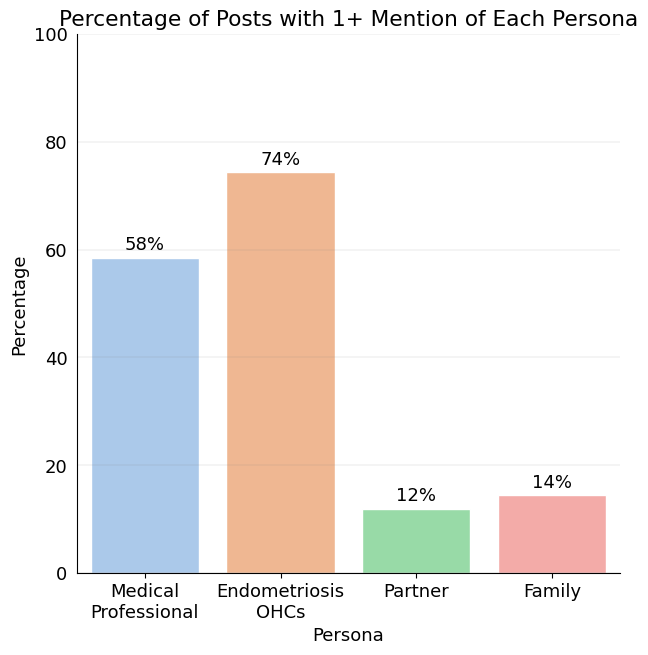

332090


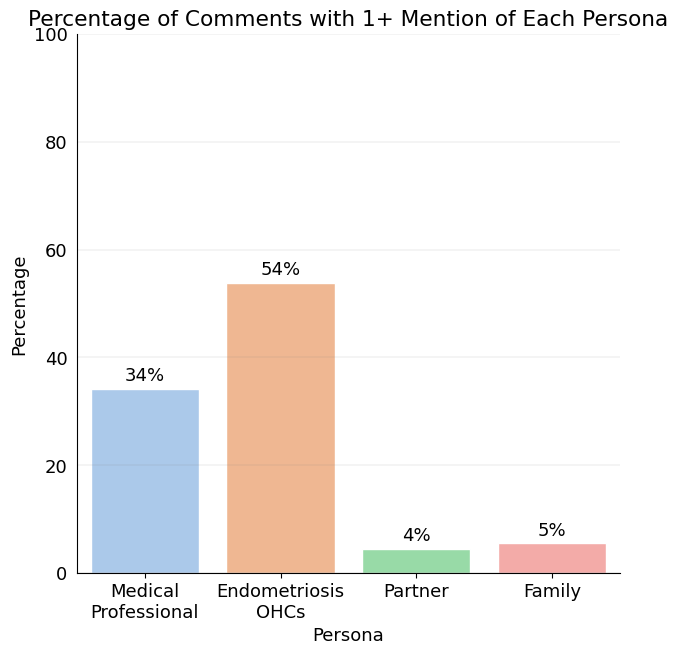

In [8]:
for t in ['Post', 'Comment']:

  personas_type = personas.loc[personas['type'] == t.lower()]
  personas_type = personas_type.groupby(['og_id'], sort=False).sum().reset_index().rename(columns = {"og_id":"id",
                                                                                                     "predictions_DOCTORS":"predictions_MEDICAL\nPROFESSIONAL",
                                                                                                     "predictions_ENDO SUPPORT COMMUNITY":"predictions_ENDOMETRIOSIS\nOHCS"}).drop(columns=['created_utc'])
  print(len(personas_type))

  # Percentage of doc with 1> mention of each persona:
  perc_personas_d = {'Percentage':[], 'Persona':[]}
  for persona in personas_names:

    perc_personas_d['Persona'].append(persona)
    column = f'predictions_{persona.upper()}'
    perc = len(personas_type[personas_type[column] > 0])/len(personas_type)*100
    perc_personas_d['Percentage'].append(perc)

  perc_personas_df = pd.DataFrame(perc_personas_d)

  plt.figure(figsize=(7, 7))
  ax = sns.barplot(data=perc_personas_df, x='Persona', y='Percentage',
                  hue='Persona', legend=False, palette='pastel',
                  edgecolor='white',
                  errorbar=None)
  for container in ax.containers:
    for v in container:
      labels = [f'{round(v.get_height())}%' for v in container]
      ax.bar_label(container, labels=labels, padding=3)
  # add grid
  ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.tick_params(left=False)# remove the ticks
  # Remove top, right border
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  plt.ylim(ymax=100)
  plt.title(f'Percentage of {t}s with 1+ Mention of Each Persona')
  # plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'personas_{t}s_perc.png'), dpi = 300)
  plt.show()

34522
Mean number of mentions of a persona per post in posts mentioning said persona:
1.72 	 MEDICAL PROFESSIONAL
1.26 	 FAMILY
1.39 	 ENDOMETRIOSIS OHCS
1.24 	 PARTNER


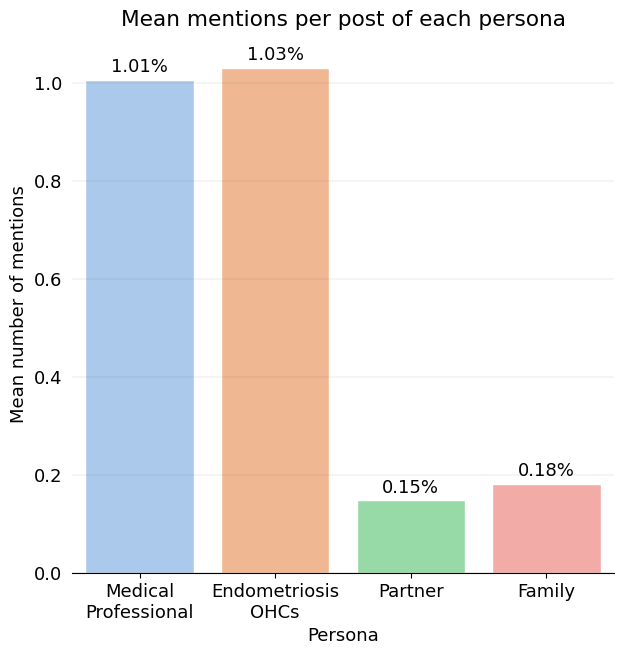

332090
Mean number of mentions of a persona per comment in comments mentioning said persona:
1.24 	 MEDICAL PROFESSIONAL
1.1 	 FAMILY
1.24 	 ENDOMETRIOSIS OHCS
1.12 	 PARTNER


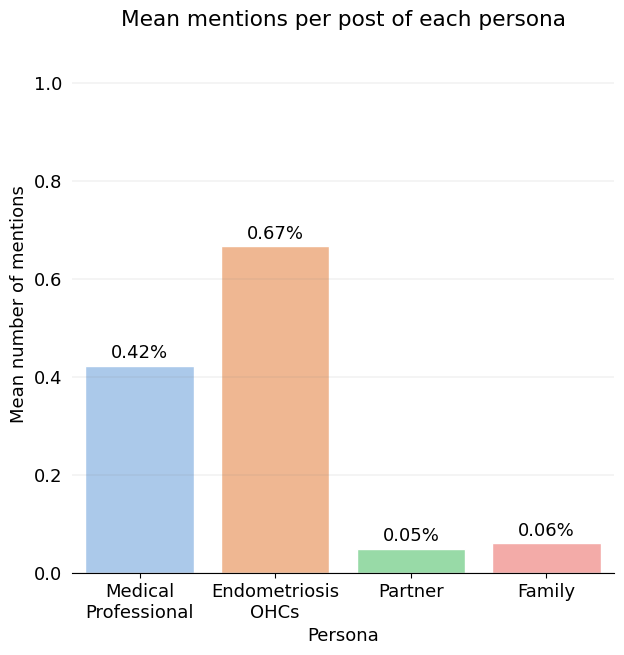

In [10]:
for t in ['Post', 'Comment']:

  personas_type = personas.loc[personas['type'] == t.lower()]
  personas_type = personas_type.groupby(['og_id'], sort=False).sum().reset_index().rename(columns = {"og_id":"id",
                                                                                                     "predictions_DOCTORS":"predictions_MEDICAL\nPROFESSIONAL",
                                                                                                     "predictions_ENDO SUPPORT COMMUNITY":"predictions_ENDOMETRIOSIS\nOHCS"}).drop(columns=['created_utc'])
  print(len(personas_type))

  print(f'Mean number of mentions of a persona per {t.lower()} in {t.lower()}s mentioning said persona:')
  for col in personas_type.columns[-4:]:
    print(round(personas_type[personas_type[col] > 0][col].mean(), 2), '\t', col.replace('\n', ' ').split('_')[1])

  # Mean mentions per post of each persona:
  mean_personas_d = {'Mean number of mentions':[], 'Persona':[]}
  for persona in personas_names:
    mean_personas_d['Persona'].append(persona)
    column = f'predictions_{persona.upper()}'
    mean = personas_type[column].mean()
    mean_personas_d['Mean number of mentions'].append(mean)

  mean_personas_df = pd.DataFrame(mean_personas_d)

  plt.figure(figsize=(7, 7))
  ax = sns.barplot(data=mean_personas_df, x='Persona', y='Mean number of mentions',
                  hue='Persona', legend=False, palette='pastel',
                  edgecolor='white',
                  errorbar=None)
  for container in ax.containers:
    for v in container:
      labels = [f'{round(v.get_height(),2)}%' for v in container]
      ax.bar_label(container, labels=labels, padding=3)
  plt.ylim(ymax=1.10)
  # add grid
  ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
  plt.tick_params(left=False)  # remove the ticks
  # Remove top, left, right border
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  plt.title('Mean mentions per post of each persona')
  # plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'personas_{t}s_mention.png'), dpi = 300)
  plt.show()

## Intent

In [11]:
intent_file = os.path.join(endo_dir, 'output', 'predictions', 'INTENT', 'intent_predictions.pkl')
intent_df = pd.read_pickle(intent_file)
print(len(intent_df))
intent_df[:1]

34715


,author,id,text,type,url,link_id,parent_id,subreddit,created_utc,time,predictions_SEEKING_EXPERIENCES,predictions_SEEKING_INFO,predictions_SEEKING_EMOTION,predictions_VENT,predictions_PROVIDING_EXPERIENCES
7,theonusta,Endo_otb0m_post,We've been a community of Endometriosis suppor...,post,http://www.reddit.com/r/Endo/comments/otb0m/up...,N/A,N/A,Endo,1327349669,2012-01-23 20:14:29,0,0,0,0,0


In [12]:
intent_df.rename(columns={'predictions_VENT':'predictions_VENTING'}, inplace=True)

In [13]:
intent_df['predictions_PROVIDING_EXPERIENCES'].unique()

array([0])

In [14]:
intent_names = ['Seeking Experiences', 'Seeking Info', 'Seeking Emotion', 'Venting']

In [15]:
# Percentage of posts with each intent:
perc_intents_d = {'Percentage':[], 'Intent':[]}
for intent in intent_names:
  new_intent = intent.replace(' ', '_').upper()
  perc_intents_d['Intent'].append(intent)
  column = f'predictions_{new_intent}'
  perc = len(intent_df[intent_df[column] > 0])/len(intent_df)*100
  perc_intents_d['Percentage'].append(perc)

perc_intents_df = pd.DataFrame(perc_intents_d)

In [16]:
perc_intents_df.head()

,Percentage,Intent
0,49.143022,Seeking Experiences
1,27.930290,Seeking Info
2,15.480340,Seeking Emotion
3,9.958231,Venting


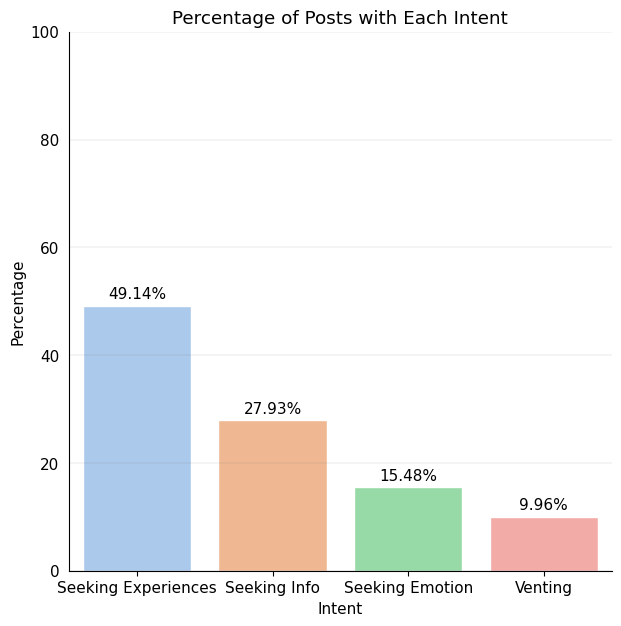

In [22]:
plt.figure(figsize=(7, 7))
ax = sns.barplot(data=perc_intents_df, x='Intent', y='Percentage',
                hue='Intent', legend=False, palette='pastel', #sns.color_palette("Set2")
                edgecolor='white',
                errorbar=None)
for container in ax.containers:
  for v in container:
    labels = [f'{round(v.get_height(), 2)}%' for v in container]
    ax.bar_label(container, labels=labels, padding=3)
plt.ylim(ymax=100)
# add grid
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
plt.tick_params(left=False)  # remove the ticks
# Remove top, left, right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Percentage of Posts with Each Intent')
# plt.savefig(os.path.join(endo_dir, 'output', 'figures', f'intent_posts.png'), dpi = 300)
plt.show()